# Group: Rui Zhao, Qianli Wang, Nazar Sopiha

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [74]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



data size = 500


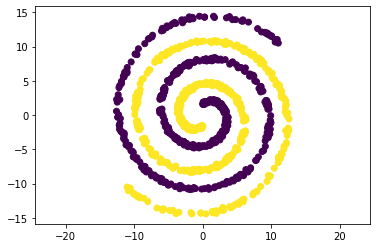

In [91]:
data_size = 500
print("data size = 500")
dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

data size = 800


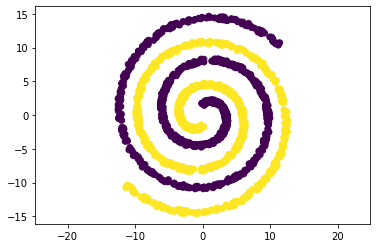

In [85]:
data_size2 = 800
print("data size = 800")
dataset2 = twospirals(data_size2)
labels2 = np.hstack((np.zeros(data_size2),np.ones(data_size2)))
plt.scatter(dataset2[:,0], dataset2[:,1], c = labels2)
plt.axis('equal')
plt.show()

data size = 1000


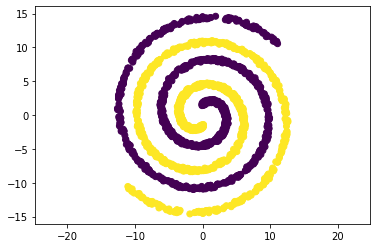

In [77]:
data_size3 = 1000
print("data size = 1000")
dataset3 = twospirals(data_size3)
labels3 = np.hstack((np.zeros(data_size3),np.ones(data_size3)))
plt.scatter(dataset3[:,0], dataset3[:,1], c = labels3)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

In [78]:
import sys 
  
# the setrecursionlimit function is 
# used to modify the default recursion 
# limit set by python. Using this,  
# we can increase the recursion limit 
# to satisfy our needs 
  
sys.setrecursionlimit(10**6) 

In [79]:
# this class record visit list
class visitlist:
    def __init__(self, count=0):
        # record unvisited points
        self.unvisitedlist = [i for i in range(count)]
        # record visited points
        self.visitedlist = list()
        self.unvisitednum = count
        
    def visit(self, point):
        self.visitedlist.append(point)
        self.unvisitedlist.remove(point)
        self.unvisitednum -= 1

In [80]:
# I changed the axis to 0, to calculate the distance between two points
def euclidean_distance(x_1, x_2):
      return np.sqrt(np.sum((x_1-x_2)**2, axis = 0)) 

# return the Neighbours of p
def rangeQuery(p, eps, dataset):
    number_Points = dataset.shape[0]
    return [i for i in range(number_Points) if euclidean_distance(dataset[i], dataset[p])<=eps]

def dbscan(dataset, eps, minPts):
    # total number of points
    number_Points = dataset.shape[0]
    visit_Points = visitlist(count=number_Points)
    # initialize the cluster, the cluster label is k
    k = -1
    Cluster = [-1 for i in range(number_Points)]
    while(visit_Points.unvisitednum > 0):
        # randomly select an unvisited point
        point = random.choice(visit_Points.unvisitedlist)
        visit_Points.visit(point)
        Neighbours = rangeQuery(point, eps, dataset)
        # at least MinPoints in the neighborhood
        if len(Neighbours) >= minPts:
            k += 1
            Cluster[point] = k
            for point1 in Neighbours:
                if point1 in visit_Points.unvisitedlist:
                    visit_Points.visit(point1)
                    # If there are at least MinPts points 
                    # in the neighborhood of point1, 
                    # add these points to N
                    newN = rangeQuery(point1, eps, dataset)
                    if len(newN) >= minPts:
                        for i in newN:
                            if i not in Neighbours:
                                Neighbours.append(i)
                    # if point1 is not yet a member of any cluster, add Point1 to Cluster
                    if Cluster[point1] == -1:
                        Cluster[point1] = k                
        # else noise point 
        else:
            Cluster[point] = -1
    # Until all points have been visited
    return Cluster

## Task a

data size = 500


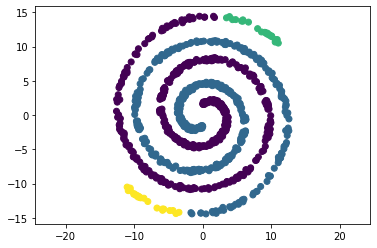

In [92]:
# optimal values:
# eps = 1.7         
# minPoints = 3

eps = 1.7        
minPoints = 3
Cluster = dbscan(dataset, eps, minPoints)

print("data size = 500")
plt.scatter(dataset[:,0], dataset[:,1], c = Cluster)
plt.axis('equal')
plt.show()

data size = 800


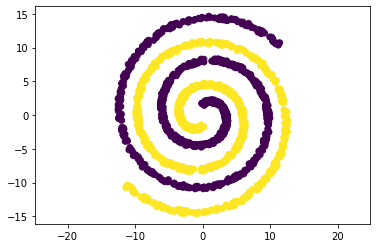

In [94]:
Cluster2 = dbscan(dataset2, eps, minPoints)

print("data size = 800")
plt.scatter(dataset2[:,0], dataset2[:,1], c = Cluster2)
plt.axis('equal')
plt.show()

data size = 1000


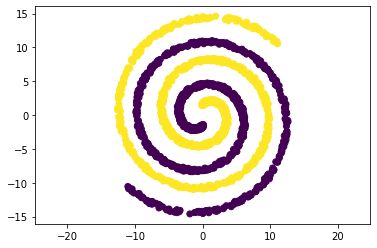

In [95]:
Cluster3 = dbscan(dataset3, eps, minPoints)

print("data size = 1000")
plt.scatter(dataset3[:,0], dataset3[:,1], c = Cluster3)
plt.axis('equal')
plt.show()

## Task b
##### Accuracy is almost always above 90%, especially if the data size is greater than 500.
##### When the data size is greater than 1000, the accuracy is almost 100%.
##### Accuracy fluctuates (mostly when the data size is too small), this is because the data is randomly generated

In [96]:
def accuracy_new(label, datasize):
    label_0 = 0
    label_1 = 0
    for i in label:
        if i == 0:label_0 += 1
        if i == 1:label_1 += 1
    return((label_0+label_1)/(2*datasize))

print("Accuracy 500:",accuracy_new(Cluster, data_size)*100,"%")

print("Accuracy 800:",accuracy_new(Cluster2, data_size2)*100,"%")

print("Accuracy 1000:",accuracy_new(Cluster3, data_size3)*100,"%")


Accuracy 500: 95.39999999999999 %
Accuracy 800: 100.0 %
Accuracy 1000: 100.0 %


## Task c

##### If the value of data_size is quite small, the DBSCAN algorithm will fail with high probability. In this example, namely 2 spirals, provided that data_size is equal to 100, then it will produce 4 different clusters, which is not expected from us.
 
##### The reason is that we can image the DBSCAN algorithm that a point(core) expands to other points as far as it can reach. In this way, a cluster can be determined. However, if the data_size is small, then it’s really possible that much more clusters will be created(found) because of the lack of points.

#### Disadvantages: 

##### 1.DBSCAN uses the uniform eps and minpts. When data is not equally distributed:
##### eps is small: cluster whose density is relatively small will be partitioned into several smaller clusters with similar properties.
##### eps in large: some of clusters that the distances between them are quite close and their densities are large enough as well, will be merged as just one cluster.

##### 2.While clustering, once DBSCAN finds a core, it will expand to other points using this core as a center. Meanwhile, the number of cores is also increasing. All unhandled points have to be stored in the database. → huge memory cost, when the given dataset is large.
